Percentage of customers behind on payments, either late or in grace period): 1.75%
Total Amount of Loans Behind on Payment: £20,714,313.12
Projected loss from loans behind on payment if charged off: £7,935,863.22
Projected revenue from loans behind on payments if completed to full term: £20,714,313.12
Projected revenue from loans behind on payments & charged off if had completed to full term: £128,113,790.28
Percentage of total expected revenue from charged-off and behind on payment loans: 13.16%


/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_71670/1462838387.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behind_loans['expected_loss'] = behind_loans['out_prncp']
/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_71670/1462838387.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behind_loans['expected_revenue'] = behind_loans['instalment'] * behind_loans['term_months']
/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_71670/1462838387.py:41: SettingWithCopyWarnin

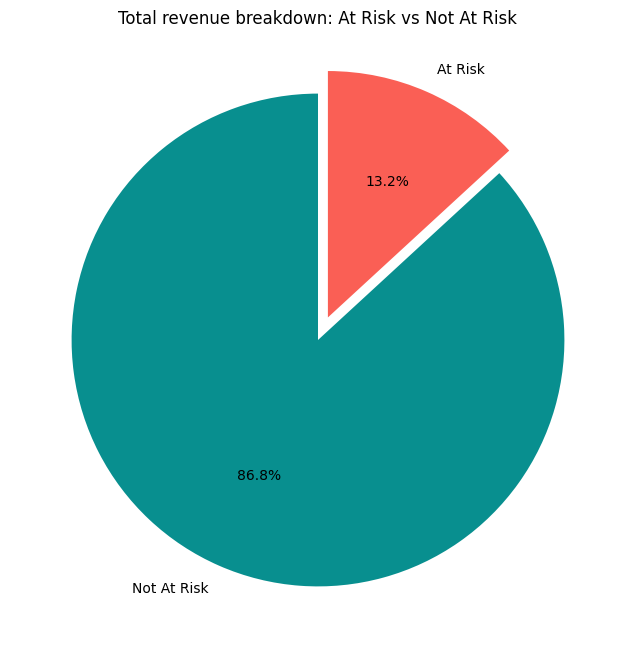

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('financial_loan_data.csv')

# checking if loan is still active
loan_status_summary = df['loan_status'].value_counts()


# selecting loans that are behind on payments and calculating percentage
behind_statuses = [
    'Late (16-30 days)',
    'Late (31-120 days)',
    'In Grace Period'
]

behind_loans = df[df['loan_status'].isin(behind_statuses)]

percentage_behind = (len(behind_loans) / len(df)) * 100
print(f"Percentage of customers behind on payments, either late or in grace period): {percentage_behind:.2f}%")

# loans behind on payment including interest
total_behind_loans_amount = (behind_loans['instalment'] * behind_loans['term_months']).sum()
print(f"Total Amount of Loans Behind on Payment: £{total_behind_loans_amount:,.2f}")

# calculating expected loss
behind_loans['expected_loss'] = (behind_loans['instalment'] * behind_loans['term_months']) - behind_loans["total_payment"]

total_expected_loss_behind = behind_loans['expected_loss'].sum()
print(f"Projected loss from loans behind on payment if charged off: £{total_expected_loss_behind:,.2f}")

# total revenue for loans late on payment
behind_loans['expected_revenue'] = behind_loans['instalment'] * behind_loans['term_months']

total_expected_revenue_behind = behind_loans['expected_revenue'].sum()
print(f"Projected revenue from loans behind on payments if completed to full term: £{total_expected_revenue_behind:,.2f}")

# calculating charged off loans revenue if they had completed to full term
loans_charged_off = df[df['loan_status'] == 'Charged Off']
loans_charged_off['expected_revenue'] = loans_charged_off['instalment'] * loans_charged_off['term_months']
total_expected_revenue_charged_off = loans_charged_off['expected_revenue'].sum()

# calculating total expected revenue for all loans
df['expected_total_payment'] = df['instalment'] * df['term_months']
total_expected_revenue_all = df['expected_total_payment'].sum()

# Sum of loans behind on payment and charged off loans' expected revenue
total_risk_revenue = total_expected_revenue_behind + total_expected_revenue_charged_off
print(f"Projected revenue from loans behind on payments & charged off if had completed to full term: £{total_risk_revenue:,.2f}")
# calculating revenue not at risk for pie chart
not_at_risk_revenue = total_expected_revenue_all - total_risk_revenue

# calculating the percentage of total expected revenue from behind on payments and charged off loans
risk_revenue_pct = (total_risk_revenue / total_expected_revenue_all) * 100
print(f"Percentage of total expected revenue from charged-off and behind on payment loans: {risk_revenue_pct:.2f}%")

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
[not_at_risk_revenue, total_risk_revenue],
labels=['Not At Risk', 'At Risk'],
autopct='%1.1f%%',
startangle=90,
colors=['#088F8F', '#FA5F55'],
explode=(0, 0.1))
plt.title('Total revenue breakdown: At Risk vs Not At Risk')
plt.show()
